# Project Answer Sheet

# 1. Import Necessary Libraries

In [1]:
import os
import sys
import warnings                                 # `dnd` mode
warnings.filterwarnings('ignore')

In [2]:
import numpy as np                              # Import Numpy library for vectors, matrix, algebra
import pandas as pd                             # Import Pandas library for dataframe preparation and manipulation
from sklearn.preprocessing import LabelEncoder  # Import library to encode categorical data
import statsmodels.api as sm                    # Statsmodel is an essential module to conduct statistical tests
from statsmodels.formula.api import ols         # For ordinary least square regression and subsequent anova
from scipy import stats                         # Scipy builds on Numpy for mathematical computation
from scipy.stats import mannwhitneyu            # Mannwhitney U is a non-parametrict test
import matplotlib.pyplot as plt                 # Import Pyplot from matplotlib
import seaborn as sns                           # Import Seaborn library for data visualization
sns.set(color_codes = True)                     # data visualization
%matplotlib inline     
from simple_colors import *                     # print text formatting 

# 2. Read the data as a data frame

In [3]:
df = pd.read_csv("/Users/kaushik/Desktop/GL/Project/insurance.csv") # import insurance data from Project folder of GL folder of Desktop

In [4]:
print(blue("The first five records in the insurance data table appear as under: ", ['bold']))
df.head(5) # print the first five records in the dataframe

The first five records in the insurance data table appear as under: 


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Perform basic EDA

## a) Shape of the data

In [5]:
print("The shape of the data is : ", df.shape) # provides the number of rows and columns in the dataframe
print(blue("Interpretation:", ["bold"]), "The shape mentioned above implies that the insurance data has", df.shape[0], "rows or records, and", df.shape[1], "columns or variables."  )

The shape of the data is :  (1338, 7)
Interpretation: The shape mentioned above implies that the insurance data has 1338 rows or records, and 7 columns or variables.


## b) Data type of each attribute

In [6]:
print(blue("The details of the insurance data and type of each variable, i.e. the Dtype is provided below: ", ['bold']))
print(df.info()); # print the variables and their data type

The details of the insurance data and type of each variable, i.e. the Dtype is provided below: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


<font color='blue'>**Interpretation:**</font> The above table implies that there are 2 variables in integer form, 2 variables in float form, and 3 variables in categorical form. 
* The integer variables, ***age*** and ***children*** (i.e. number of children) are discrete numerical variaables. ***Since Age is presumed to have much higher number of unique values, we would treat age as a continuous variable. But, since the number of children a person can have is fairly limited in terms of unique values, we would treat this as a categorical variable.*** 
* The float variables, ***bmi*** and ***charges*** are continuous numerical variables. 
* The object variables, ***sex***, ***region***, and ***smoker*** (i.e. whether smoker or not) are categorical variables.

## c) Checking the presence of missing values

In [7]:
print(blue("The number of missing values corresponding to each variable is given below: ", ["bold"]))
df.isnull().sum().to_frame("Number of Missing Values") # create a table of boolean values regarding whether the corresponding cells have missing data and then sum the counts

The number of missing values corresponding to each variable is given below: 


,Number of Missing Values
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


<font color="blue"> **Interpretation:** </font> There are no missing values in the insurance dataframe.

## d) 5 point summary of numerical attributes

In spite of the fact that children will be considered as a categorical variable going forward, I want to check the type of data we have here in terms of what proportion of sample has children of some specific numbers. So, I am retaining children in this section.

In [8]:
print(blue("The description of numerical attributes is given below :", ["bold"]))
numerical = ["age", "bmi", "charges", "children"]
df[numerical].describe() # this will provide number of records, mean, standard deviation, and the 5-point summary of each numerical attribute in the dataframe

The description of numerical attributes is given below :


,age,bmi,charges,children
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265,1.094918
std,14.049960,6.098187,12110.011237,1.205493
min,18.000000,15.960000,1121.873900,0.000000
25%,27.000000,26.296250,4740.287150,0.000000
50%,39.000000,30.400000,9382.033000,1.000000
75%,51.000000,34.693750,16639.912515,2.000000
max,64.000000,53.130000,63770.428010,5.000000


<font color='blue'>**Five-point Summary of Numerical Attributes:**</font>  The 5-point summary derived from the 1,338 records are as under:
* **Age :** The age range of the sample is 18 – 64 years. Median age is 39 years, which is almost equal to the average age (mean). It is expected that the age data has a nearly symmetrical distribution, but it will depend upon the number of modes. The interquartile range (IQR) is 27 – 51 years. This implies that 50% of the sample's age fall between 27 – 51 years. The lowest 25% of age falls between 18 – 27 years; and the highest 25% of age falls between 51 – 64 years.


* **bmi :** The bmi range of the sample is 15.96 – 53.13. Median bmi is 30.40, which is almost equal to the average bmi (mean) of 30.66. Therefore it is expected that the bmi data has a nearly symmetrical distribution. The IQR is 26.30 – 34.69. This implies that 50% of the sample's bmi fall between 26.30 – 34.69. The lowest 25% of bmi falls between 15.96 – 26.30; and the highest 25% of bmi falls between 34.69 – 53.13.


* **Children :** The number of children to each individual ranges from 0 – 5. Median number of children is 1, which is almost equal to the average number of children. Therefore, 50% of the sample has 1 or less child. The IQR is 0 – 2. 25% sample has >2 children. Because the number of children can only vary from 0 – 5, the variable is discrete.


* **Charges :** The charges range of the sample is 1,121.87 – 63,770.43. Median charges is 9,382.03, which is substantially lower than the average charges (mean) of 13,270.42. This implies that the charges data is likely to have a right skewed distribution. The IQR is 4,740.29 – 16,639.91. The mean and the IQR imply that 50% of the sample's charges fall below 9,382.03, and 75% of the charges data fall below 16,639.91. It is expected that there would be outliers near the upper range, which can be confirmed through boxplot later.

## e) Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. 

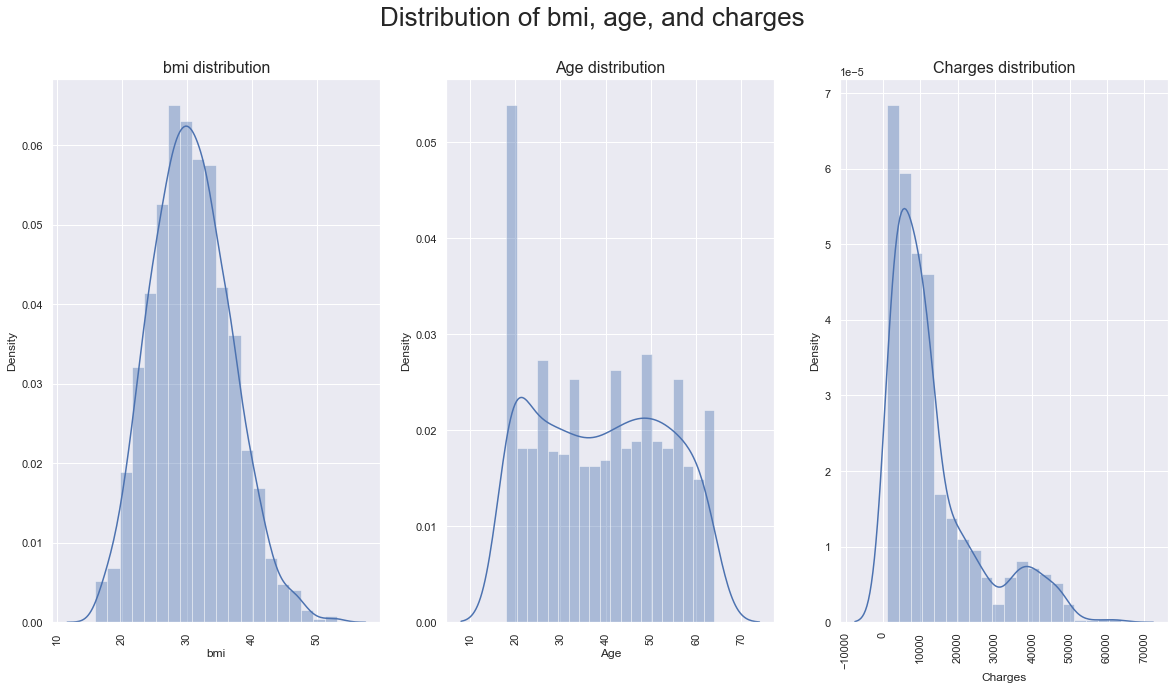

In [9]:
col = ["bmi", "age", "charges"]


fig, ax = plt.subplots(1, 3, figsize=(20, 10))
for variable, subplot in zip(col, ax.flatten()):
    sns.distplot(df[variable], bins = 20, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90) 
ax[0].set_title('bmi distribution', fontsize=16)
ax[0].set_xlabel('bmi')
ax[0].set_ylabel('Density')
ax[1].set_title('Age distribution', fontsize=16)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Density')
ax[2].set_title('Charges distribution', fontsize=16)
ax[2].set_xlabel('Charges')
ax[2].set_ylabel('Density')
fig.suptitle('Distribution of bmi, age, and charges', fontsize=26);

<font color = 'blue'> **Interpretation :** </font>

bmi:


* The bmi data is fairly symmetrically distributed, with a bell-shaped curve. 
* The data is unimodal, with the mode overlapping with mean and median calculated earlier.
* There is a slightly positive skewness, which can be well within the skewness threshold (can be confirmed later through calculation of skewness).  
* It seems that the bmi data has some outliers above 50 (can be confirmed later through boxplot).

Age:


* The Age data is bimodal. It has two modes (roughly at 20 and 40) around which the observations are concentrated.
* The first/ lower mode has much higher concentration of data than the second one.
* There is no outlier in the Age data.

Charges:


* The Charges data has a right skewed distribution.
* It has two modes– one at roughly 3,000 and the other at roughly 40,000.


## f) Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 

In [10]:
print(blue("The skewness of the three variables– age, bmi, and charges are :\n", ["bold"]))
skewness = df[["age", "bmi", "charges"]].skew(axis = 0).to_frame("Skewness")
skewness.style.applymap(lambda x: 'background-color : red' if x>1 else ('background-color : orange' if x>0.5 else ''))

The skewness of the three variables– age, bmi, and charges are :



,Skewness
age,0.055673
bmi,0.284047
charges,1.515880


<font color = 'blue'> **Interpretation :** </font>

Among the three variables, the skewness of distribution of Age and bmi falls between –0.5 to +0.5 and the distributions can be considered as approximately symmetric.

The skewness of Charges data is > +1, and therefore the distribution is highly right-skewed.

## g) Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

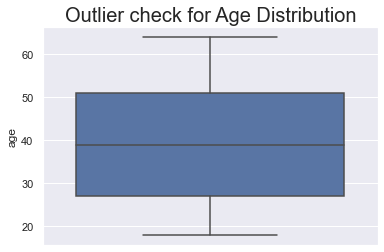

In [11]:
sns.boxplot(y="age", x= None, data=df)
plt.title("Outlier check for Age Distribution", fontsize=20);

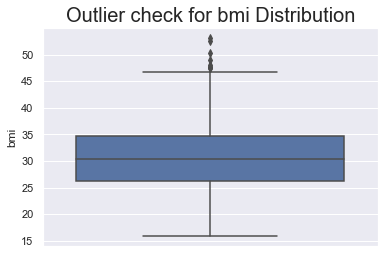

In [12]:
sns.boxplot(y="bmi", x= None, data=df)
plt.title("Outlier check for bmi Distribution", fontsize=20);

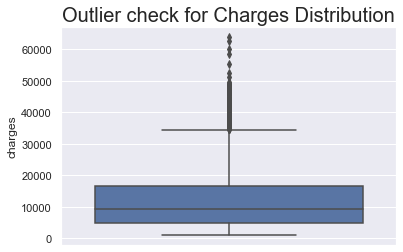

In [13]:
sns.boxplot(y="charges", x= None, data=df)
plt.title("Outlier check for Charges Distribution", fontsize=20);

<font color = 'blue'> **Interpretation :** </font>

* As presumed earlier, the boxplot shows that the **age** data does not have an outlier, and **bmi** data has outliers near the max value. 
* For **Charges** data, we are getting large number of outliers near the max value because the distribution was right skewed, had a small second mode, and therefore, boxplot considered all of them as outliers. This data requires a cuberoot transformation before conducting boxplot to address the limitation posed through right skewness of the data.

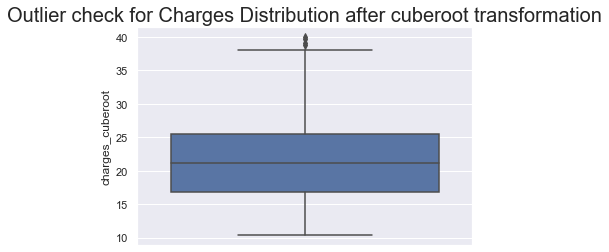

In [14]:
df['charges_cuberoot']=np.power((df['charges']),1/3)
sns.boxplot(y="charges_cuberoot", x= None, data=df)
plt.title("Outlier check for Charges Distribution after cuberoot transformation", fontsize=20);

<font color = 'blue'> **Interpretation of charges data after cuberoot transformation:** </font>

The charges data has only a few outliers and the most of the outliers detected in the boxplot of untreated charges data were actually due to the right skewed distribution.

## h) Distribution of categorical columns (include children)

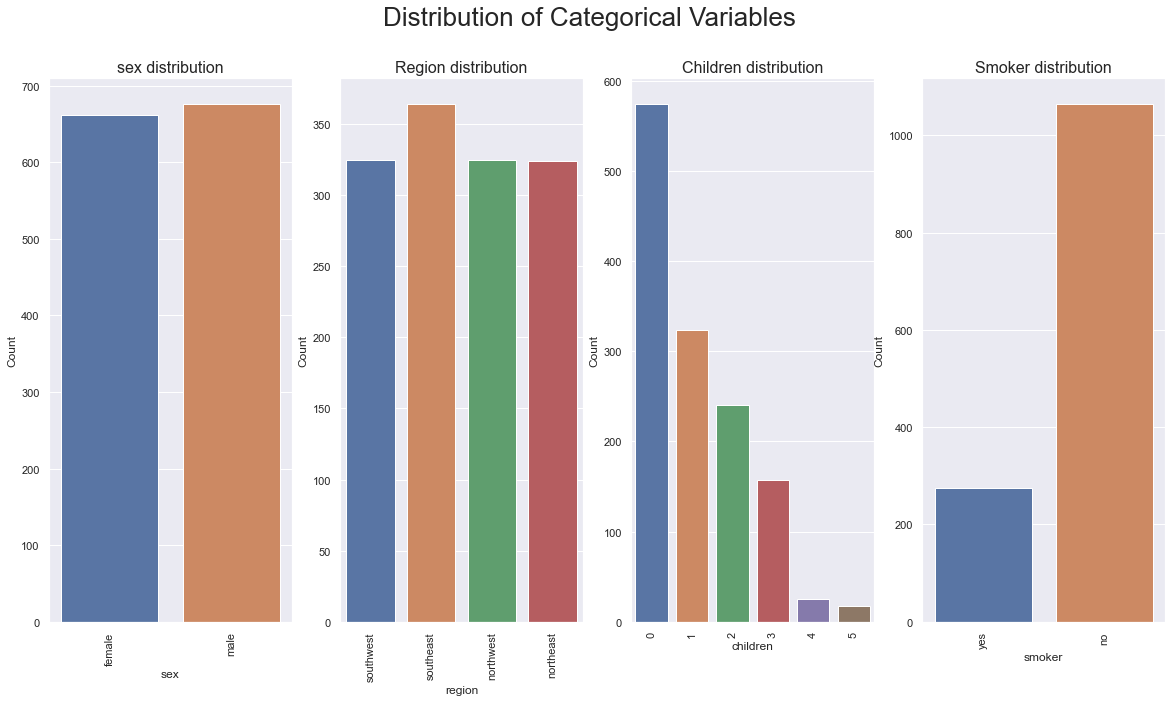

In [15]:
categorical = ["sex", "region", "children", "smoker"]


fig, ax = plt.subplots(1, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90) 
ax[0].set_title('sex distribution', fontsize=16)
ax[0].set_ylabel('Count')
ax[1].set_title('Region distribution', fontsize=16)
ax[1].set_ylabel('Count')
ax[2].set_title('Children distribution', fontsize=16)
ax[2].set_ylabel('Count')
ax[3].set_title('Smoker distribution', fontsize=16)
ax[3].set_ylabel('Count')
fig.suptitle('Distribution of Categorical Variables', fontsize=26);

<font color = 'blue'> **Interpretation :** </font>

* The data has a nearly equal proportion of male and female genders.
* The Southeast (SE) region has a higher proportion of occurence in the sample, suggesting more sample is from the SE region. The remaining regions have equal proportion / occurence in the dataframe. 
* As identified earlier through 5-point summary, majority of sample have upto 2 children. Only a very small subset has >2 children.
* The smoker distribution is unbalanced, where majority of the population are non-smokers and a small subset is smoker.

## i) Pair plot that includes all the columns of the data frame 

In seaborn pairplot we can classify different numerical attributes through making one categorical variable characterising the hue. I have shown the relation between numerical columns, with categorical classification through hue for each categorical variable. Then, to include all the columns of the dataframe, I have therefore encoded the sex and regions and used "smoker" variable for classification.

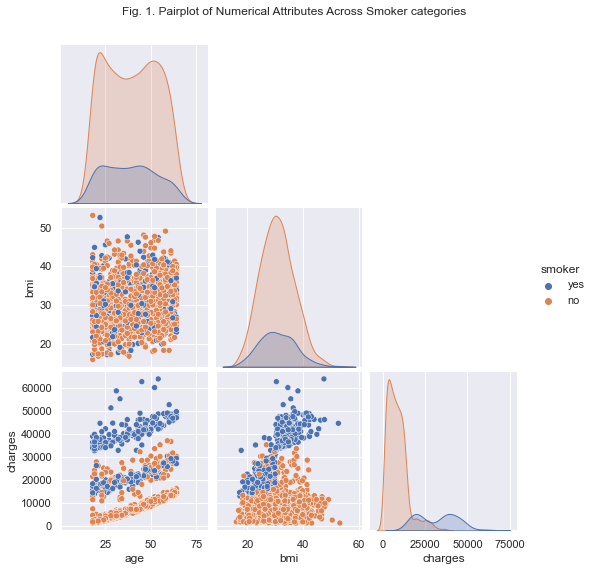

In [16]:
df1 = df[["age", "bmi", "charges", "smoker"]]
g1 = sns.pairplot(df1, hue = "smoker", diag_kind = "kde", corner = True)
g1.fig.suptitle("Fig. 1. Pairplot of Numerical Attributes Across Smoker categories", y = 1.05);

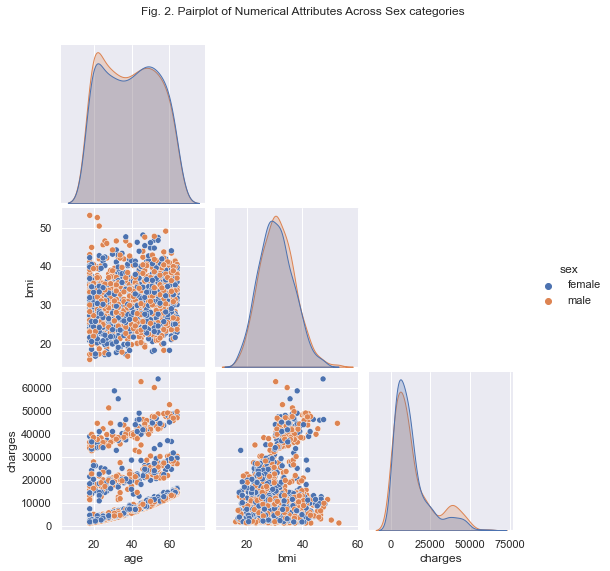

In [17]:
df2 = df[["age", "bmi", "charges", "sex"]]
g2 = sns.pairplot(df2, hue = "sex", diag_kind = "kde", corner = True)
g2.fig.suptitle("Fig. 2. Pairplot of Numerical Attributes Across Sex categories", y = 1.05);

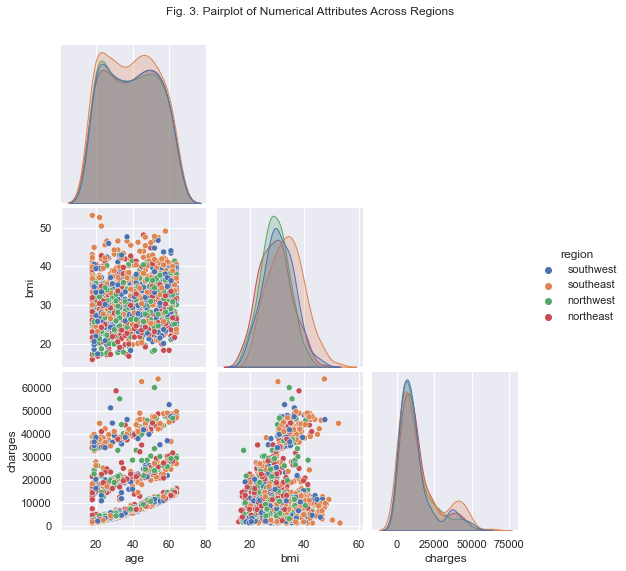

In [18]:
df3 = df[["age", "bmi", "charges", "region"]]
g3 = sns.pairplot(df3, hue = "region", diag_kind = "kde", corner = True)
g3.fig.suptitle("Fig. 3. Pairplot of Numerical Attributes Across Regions", y = 1.05);

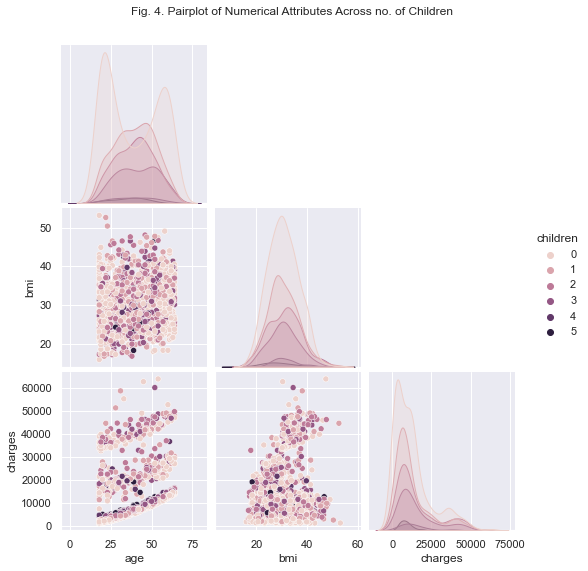

In [19]:
df4 = df[["age", "bmi", "charges", "children"]]
g4 = sns.pairplot(df4, hue = "children", diag_kind = "kde", corner = True)
g4.fig.suptitle("Fig. 4. Pairplot of Numerical Attributes Across no. of Children", y = 1.05);

In [20]:
le = LabelEncoder()                               # create instance for label encoder
df['sex_cat'] = le.fit_transform(df['sex'])       # codes the "sex" variable; 
df['region_cat'] = le.fit_transform(df['region']) # codes the "region" variable

In [21]:
df_new = df[["age", "bmi", "charges", "sex_cat", "region_cat", "children", "smoker"]]

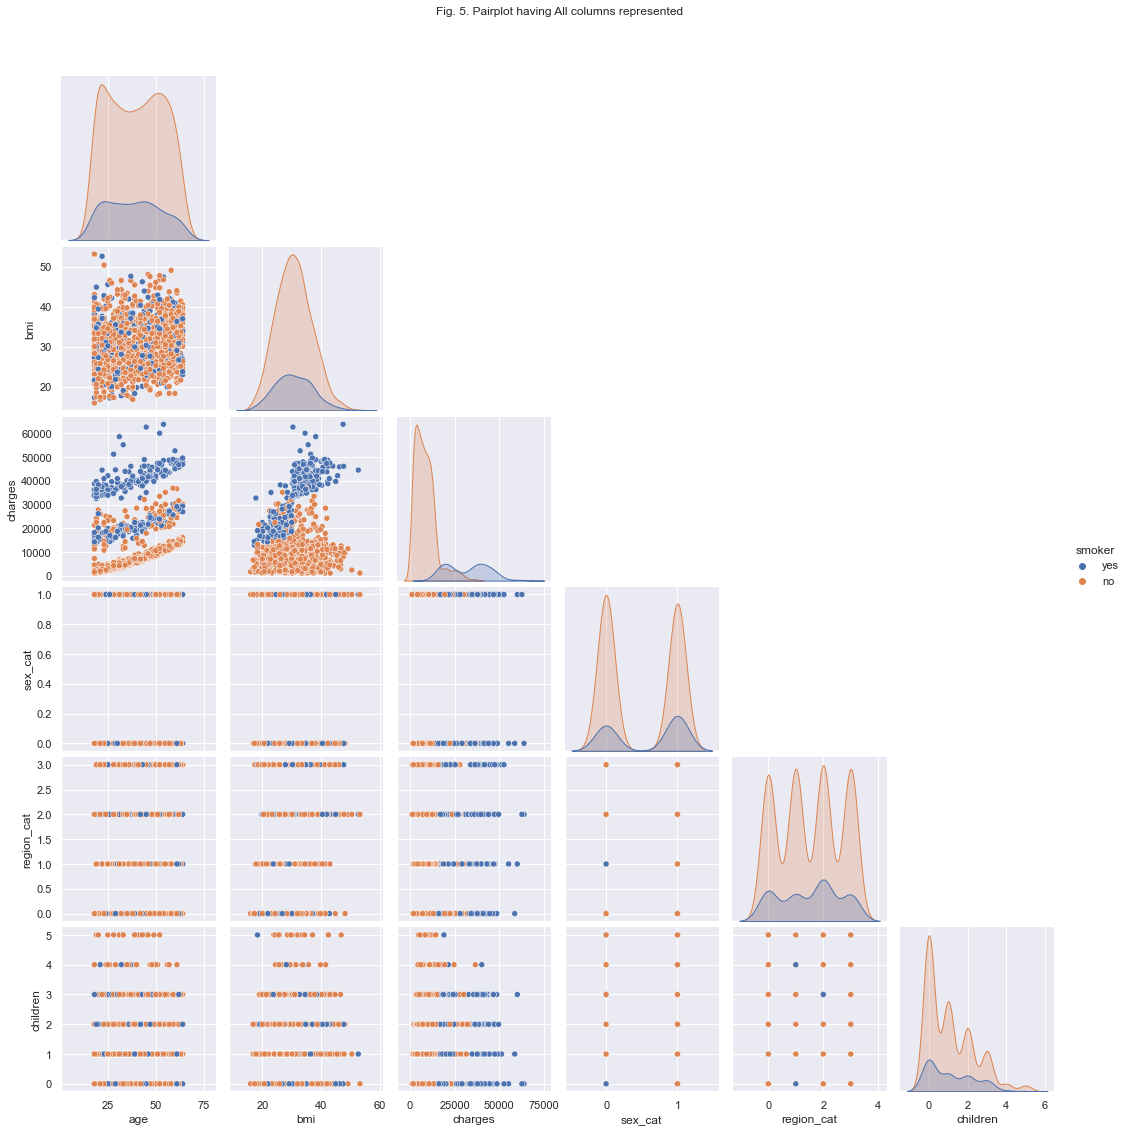

In [22]:
g5 = sns.pairplot(df_new, hue = "smoker", diag_kind = "kde", corner = True)
g5.fig.suptitle("Fig. 5. Pairplot having All columns represented", y = 1.05);

<font color = 'blue'> **Interpretation :** </font>

**Fig. 1.** Charges increases with age. Those who are having higher age, and who are smokers are paying more charges. BMI probably increases slightly with increased age. Charges have a higher spread and also increases with more BMI. 
**Fig. 2.** In the sample, females are more sprasely spread across age. However, the charges and BMI did not appear to have any discernoble difference across sex categories.
**Fig. 3.** There is no discernible region-wise change for age and BMI. But, people of NorthEast regions are more within the charges segment of 10,000 to 30,000.
**Fig. 4.** People who have higher numbers of children (3,4,5) are mostly in the age group of 25-50. Those who have 4-5 children are paying charges roughly upto 20,000. 
**Fig. 5.** Males seem to have slightly higheer number of smokers and that differs with age as well. 

# 4a. Do charges of people who smoke differ significantly from the people who don't? 

In [23]:
print(blue("Describing the charges among smokers and non-smokers: ", ["bold"]))
df[["smoker","charges"]].groupby('smoker').describe() # describing the charges among smokers and non-smokers

Describing the charges among smokers and non-smokers: 


charges                                                        \
         count          mean           std         min           25%   
smoker                                                                 
no      1064.0   8434.268298   5993.781819   1121.8739   3986.438700   
yes      274.0  32050.231832  11541.547176  12829.4551  20826.244213   

                                                
                50%           75%          max  
smoker                                          
no       7345.40530  11362.887050  36910.60803  
yes     34456.34845  41019.207275  63770.42801

**Interpretation:** Apparently the mean charges for smokers are much higher than the mean charges for non-smokers.

In [24]:
# Subsetting data: Creating a subset of smokers and non-smokers with the charges column
smoker = df.query('smoker == "yes"')['charges']
non_smoker = df.query('smoker == "no"')['charges']

**Hypothesis:**
The null hypothesis here is that there is no significant difference in the charges among smokers and non-smokers. The alternate hypothesis is that the mean charges of smokers and non-smokers are different. Through hypothesis test, I will find out whether the null hypothesis hypothesis is accepted or rejected.

In [25]:
# Checking the normality of the two subsets as the parent set had a highly right skewed charges data. 
print(blue("Choosing the hypothesis test", ["bold"]))
print("The normality test result for smoker subset is given by: \n", stats.shapiro(smoker)) # I have used Shapiro Wilk test here
print("\n The normality test result for non_smoker subset is given by: \n", stats.shapiro(non_smoker))

Choosing the hypothesis test
The normality test result for smoker subset is given by: 
 ShapiroResult(statistic=0.9395521879196167, pvalue=3.6251879276250065e-09)

 The normality test result for non_smoker subset is given by: 
 ShapiroResult(statistic=0.8728628158569336, pvalue=1.4455900162299346e-28)


*Although the data is non-normal, I will conduct first an independent sample t test, and because the data is non-normal I will validate the result with a subsequent non-parametric test– the Mannwhitney U test which follows a ranking mechanism to compare the medians instead of using the mean for comparison.*

In [26]:
stats.levene(smoker, non_smoker) #checking the equality of variance before conducting the t-test.

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

**Interpretation:** The variance are different between the two subsets.

In [27]:
res1 = stats.ttest_ind(smoker, non_smoker, 
                      equal_var=False) # conducting the independent sample t-test for inequal variance

display(res1)

Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)

**Interpretation:**
* The t-value is given above as the test statistic.
* The test is statistically significant. p<0.05
* The null hypothesis is rejected.
* **Charges therefore differ signifivantly between those who smoke and don't smoke.**

In [28]:
print(blue("checking with non-parametric test", ["bold"]))
stat, p = mannwhitneyu(smoker, non_smoker) # checking with non-parametric test
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Interpretation: The charges do not differ between smokers and non-smokers (fail to reject H0)')
else:
    print('Interpretation: The charges differ significantly between smokers and non-smokers (reject H0)')

checking with non-parametric test
Statistics=7403.000, p=0.000
Interpretation: The charges differ significantly between smokers and non-smokers (reject H0)


# 4b. Does bmi of males differ significantly from that of females? 

In [29]:
print(blue("Describing the bmi among males and females:", ["bold"]))
df[["sex","bmi"]].groupby('sex').describe() # describing the bmi among males and females

Describing the bmi among males and females:


bmi                                                               
        count       mean       std     min     25%      50%       75%    max
sex                                                                         
female  662.0  30.377749  6.046023  16.815  26.125  30.1075  34.31375  48.07
male    676.0  30.943129  6.140435  15.960  26.410  30.6875  34.99250  53.13

Apparently the Average bmi seems to be almost equal for males and females.

In [30]:
# Subsetting data
males = df.query('sex == "male"')['bmi']
females = df.query('sex == "female"')['bmi']

**Hypothesis:**
The null hypothesis here is that there is no significant difference in the bmi among males and females. The alternate hypothesis is that the average bmi of males and females are different. Through hypothesis test, I will find out whether the null hypothesis is accepted or rejected.

In [31]:
print(blue("Normality Test:", ["bold"]))
print("The normality test result for males subset is given by: \n", stats.shapiro(males), "\n")
print("The normality test result for females subset is given by: \n", stats.shapiro(females))

Normality Test:
The normality test result for males subset is given by: 
 ShapiroResult(statistic=0.9930475354194641, pvalue=0.003130641533061862) 

The normality test result for females subset is given by: 
 ShapiroResult(statistic=0.9930257797241211, pvalue=0.0035433683078736067)


The p-value is a bit lower than 0.05. However, that is probably because we noted some skewness within the bmi data. t-test is robust to such small deviations from normnality if the number of sample is large. So we will go by t-test only.

In [32]:
print(blue("Equality of Variance Check:", ["bold"]))
stats.levene(males, females)

Equality of Variance Check:


LeveneResult(statistic=0.0039394029791134, pvalue=0.949963293424026)

***There is no significant difference in the variance of the data subsets.***

In [33]:
res2 = stats.ttest_ind(males, females, 
                      equal_var=True)

display(res2)

Ttest_indResult(statistic=1.696752635752224, pvalue=0.08997637178984932)

**Interpretation:**
* The t-value is given above as the test statistic.
* The test is statistically not significant. p-value is not <0.05.
* The null hypothesis cannot be rejected.
* **There is no significant difference in the bmi of males and females.**

# 4c. Is the proportion of smokers significantly different in different genders?

I have two categorical variables here– "smoker" and "sex". I want to find out whether the proportions are different across the categories. In order to do that I will first cross-tab the data and then check with hypothesis test. 

In [34]:
crosstab = pd.crosstab(df['sex'], df['smoker'])
crosstab

smoker,no,yes
sex,,
female,547,115
male,517,159


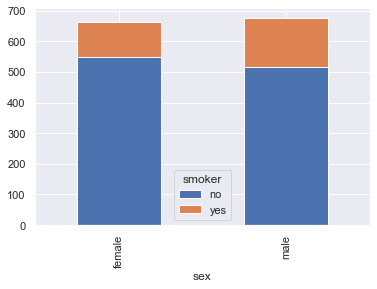

In [35]:
crosstab.plot.bar(stacked=True)
plt.show()

Males have higher proportions of smokers compared to females, as was also discernible from the pairplot earlier.

**Hypothesis:** The null hypothesis here is that the proportion of smokers are not different between males and females. The alternate hypothesis is that the proportions of smokers are different between males and males. I will test the null hypothesis with Chi-square contingency test for the contingency table above. 

In [36]:
stats.chi2_contingency(crosstab) # A Chi-square contingency test is conducted here for the two-way table/ contingency table.

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 135.56651719],
        [537.56651719, 138.43348281]]))

**Interpretation:**
The Chi-square value 7.39 is significant at 1 degree of freedom.
The test result is significant suggesting that the null hypothesis can be rejected. p<0.05.
**The proportion of smokers differs across sex, and males have higher proportion of smokers.** 

# 4d. Is the distribution of bmi across women with no children, one child and two children, the same? 

In [37]:
# Subsetting data
females = df.query('sex == "female"')[['children','bmi']]
child_sub = df.query('children < 3')[['children','bmi']]

In [38]:
print(blue("Describing the BMI among subset of females having 0/1/2 children", ["bold"]))
child_sub.groupby('children').describe()

Describing the BMI among subset of females having 0/1/2 children


bmi                                                            \
          count       mean       std     min       25%      50%       75%   
children                                                                    
0         574.0  30.550296  6.039106  15.960  26.14375  30.3025  34.74625   
1         324.0  30.623148  6.101435  16.815  26.61500  30.0150  34.23750   
2         240.0  30.978104  6.509644  16.815  25.78625  31.6400  35.35750   

                 
            max  
children         
0         53.13  
1         52.58  
2         48.07

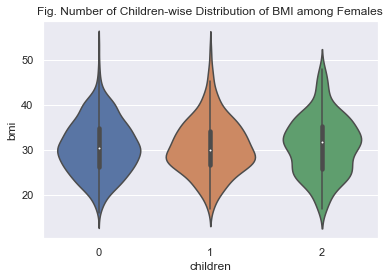

In [39]:
sns.violinplot(x="children", y="bmi", data=child_sub).set_title('Fig. Number of Children-wise Distribution of BMI among Females');

**Interpretation:**
In the females who have two children the average age seems to be higher and the spread is slightly higher. Whether that is statistically significant or not can be tested through hypothesis test.

**Hypothesis:**

The null hypothesis in this case is that the distribution of bmi across women with no children, one child and two children are the same. The alternate hypothesis is that the distribution of bmi across women with no children, one child and two children are not the same. We will test the null hypothesis using one-way ANOVA.

In [40]:
lm = ols('bmi ~ children', data = child_sub).fit() # Crating the linear model.
table = sm.stats.anova_lm(lm)                      # Conducting one way ANOVA
print(table)

              df        sum_sq    mean_sq         F    PR(>F)
children     1.0     27.272296  27.272296  0.719586  0.396458
Residual  1136.0  43054.351120  37.899957       NaN       NaN


**Interpretation:**
The One-Way ANOVA shows that the children-wise difference of bmi among females is not statistically significant. p-value is not <0.05.

In [41]:
print(blue("Checking Normality Assumption:"))
w, pvalue = stats.shapiro(lm.resid)
print("The statistic is ", w, ". The p-value is", pvalue)

Checking Normality Assumption:
The statistic is  0.9939672946929932 . The p-value is 0.00014748206012882292


**Interpretation:** The outcome variable is not normally distributed. Therefore, a non-parametric test, Kruskal-Wallis test is done below to compare the median.

In [42]:
stats.kruskal(*[group["bmi"].values for name, group in child_sub.groupby("children")])

KruskalResult(statistic=0.9399478668934065, pvalue=0.6250185601499729)

**Interpretation:** The Kruskal-Wallis test for median revealed that the medians are also not significantly different.

**Therefore, the distribution of bmi across women with no children, one child and two children is the same.**